     Age  Sex  BP max   BP min   Pr   RR     T   SPo2   Outcome
0     38    0      105       70  110   19  37.0     88        1
1     66    1      160       95   65   19  37.0     95        1
2     71    0      130       80   70   17  37.0     91        1
3     94    1      100       60  100   21  37.5     89        0
4     55    1       90       60   90   20  35.5     96        1
..   ...  ...      ...      ...  ...  ...   ...    ...      ...
487   74    1      140       80   88   15  37.9     80        0
488   76    0      135       65   65   20  36.6     65        0
489   49    0      130       80   99   18  37.8     95        1
490   62    0      121       67   97   24  37.6     97        0
491   34    1       90       60   75   19  36.5     46        0

[492 rows x 9 columns]
Gender distribution:
 0    297
1    195
Name: Sex, dtype: int64 

Outcome distribution:
 1    306
0    186
Name: Outcome, dtype: int64 

shape of train_x= (393, 7)
shape of test_x= (99, 7)
shape of train_y= (

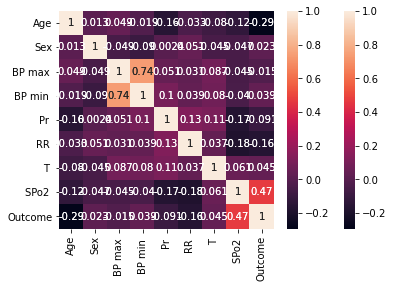

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
#from imblearn.over_sampling import SMOTE

data=pd.read_csv(r"data_set.csv")
data.head()

data=data.iloc[:,[0,1,2,3,4,5,6,7,8,]] 
print(data)

data.dtypes

data.isnull().sum()

sns.heatmap(data.corr(),annot= True)

le=LabelEncoder()
data['Sex']=le.fit_transform(data.Sex)
# data['Ventilated']=le.fit_transform(data.SPo2)
data['Outcome']=le.fit_transform(data.Outcome)
data

data.corr()
sns.heatmap(data.corr(),annot=True)

data['Outcome'].value_counts()

print("Gender distribution:\n",data['Sex'].value_counts(),"\n")
# print("Ventilated  distribution:\n",data['Ventilated'].value_counts(),"\n")
print("Outcome distribution:\n",data['Outcome'].value_counts(),"\n")




X,Y=data.iloc[:,0:7],data.iloc[:,8]
train_x,test_x,train_y,test_y= train_test_split(X,Y,test_size=0.2,random_state=55)
print("shape of train_x=",train_x.shape)
print("shape of test_x=",test_x.shape)
print("shape of train_y=",train_y.shape)
print("shape of test_y=",test_y.shape)


#LOGISTIC REGRESSION
LR = LogisticRegression(max_iter=1000)
LR.fit(train_x,train_y)
pred= LR.predict(test_x)
print("Confusion matrix of Logisitc Regression Model\n",metrics.confusion_matrix(test_y,pred))
print("Accuracy of Logisitc Regression Model         \t",metrics.accuracy_score(test_y,pred))
print("Recall score of Logisitc Regression Model     \t",metrics.recall_score(test_y,pred))
print("Precision Score of Logisitc Regression Model  \t",metrics.precision_score(test_y,pred))
print("f1 score of Logisitc Regression Model         \t",metrics.f1_score(test_y,pred))

#RANDOM FOREST
rf=RandomForestClassifier()
rf.fit(train_x,train_y)
pred=rf.predict(test_x)
print("Confusion matrix of Random Forest Classifier Model\n",metrics.confusion_matrix(test_y,pred))
print("Accuracy of Random Forest Classifier Model        \t",metrics.accuracy_score(test_y,pred))
print("Recall score of Random Forest Classifier Model    \t",metrics.recall_score(test_y,pred))
print("Precision Score of Random Forest Classifier Model \t",metrics.precision_score(test_y,pred))
print("f1 score of Random Forest Classifier Model        \t",metrics.f1_score(test_y,pred))